In [4]:
from matplotlib import pyplot as plt
from skimage.io import imread
import numpy as np
import datetime
import math
import os
from tensorflow.keras.utils import to_categorical, Sequence
import tensorflow as tf
import keras

In [5]:
img_dir = '/kaggle/input/artificial-lunar-rocky-landscape-dataset/images/render'
mask_dir = '/kaggle/input/artificial-lunar-rocky-landscape-dataset/images/clean'

# Sort the files in root directories, Create and Store the complete image and mask paths
images = [os.path.join(img_dir, x) for x in sorted(os.listdir(img_dir))]
masks = [os.path.join(mask_dir, x) for x in sorted(os.listdir(mask_dir))]



# First 8000 images for training
X_train = images[:8000]
y_train = masks[:8000]

#remaining can be used for validation purpose

X_valid = images[8000: -4]
y_valid = masks[8000: -4]

# save some for testing purpose, let us say the last 4

X_test = images[-4 : ]
y_test = masks[-4 : ]



In [6]:
#consider an example to understand this

mask_sample_path = y_train[1]

print(mask_sample_path)

/kaggle/input/artificial-lunar-rocky-landscape-dataset/images/clean/clean0002.png


In [7]:
# Read the mask as gray scale

sample_mask_arr = imread(mask_sample_path, as_gray=True)
print(sample_mask_arr.shape)

(480, 720)


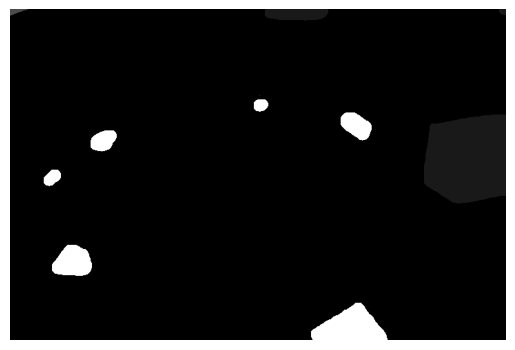

In [8]:
# Read the mask as gray scale

sample_mask_arr = imread(mask_sample_path, as_gray=True)

# Display the image
plt.imshow(sample_mask_arr, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()

In [9]:
# why did we crop the image ?
# Ans: Because the model that we are going to use expects the image
#      to be in square shape.

sample_mask_cropped = sample_mask_arr[:480, :480]
print(sample_mask_cropped.shape)

(480, 480)


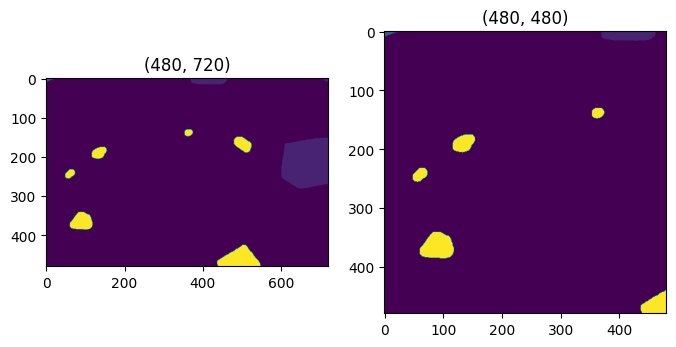

In [10]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

plot_data = ((sample_mask_arr, sample_mask_cropped),
            (sample_mask_arr.shape, sample_mask_cropped.shape))

for(ax, arr, title) in zip(axes,*(plot_data)):
    ax.imshow(arr)
    ax.set_title(title)

In [11]:
# check the unique values in cropped_mask
np.unique(sample_mask_cropped)

# How are they unique ?
# Ans: Sky - small rock - big rock - background

array([0.    , 0.0721, 0.2125, 0.7154])

In [12]:
# trying to classify the uniques value of the image, 
# which are signifying different aspects of the image
np.unique(sample_mask_cropped)//0.07

array([ 0.,  1.,  3., 10.])

In [13]:
adjusted_mask = sample_mask_cropped//0.07
adjusted_mask[adjusted_mask == 3.0] = 2.0
adjusted_mask[adjusted_mask == 10.0] = 3.0
print(np.unique(adjusted_mask))

[0. 1. 2. 3.]


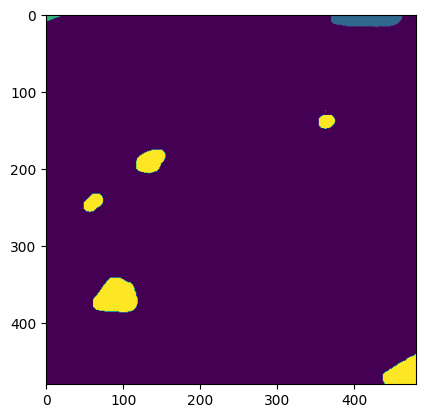

In [14]:
plt.imshow(adjusted_mask)

In [15]:
final_sample_mask = to_categorical(adjusted_mask, num_classes=4)
print("Before adding channels : ", adjusted_mask.shape)
print("After adding the channels : ", final_sample_mask.shape)
# This filter divied the lunar terrain image into 3 different channels
# where all 4 channels are signifying a different class or feature about the image

Before adding channels :  (480, 480)
After adding the channels :  (480, 480, 4)


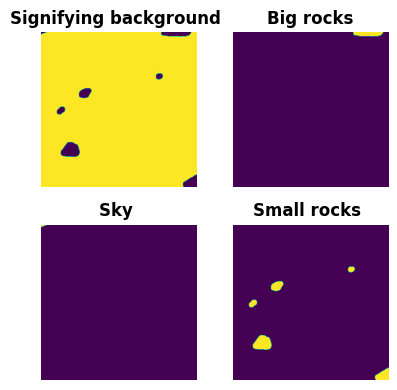

In [16]:
plt.figure(figsize=(4, 4))


plt.subplot(2, 2, 1)
plt.imshow(final_sample_mask[:,:,0])
plt.title(f'Signifying background ', color='k', weight='bold')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(final_sample_mask[:,:,1])
plt.title(f'Big rocks', color='k', weight='bold')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(final_sample_mask[:,:,2])
plt.title(f'Sky ', color='k', weight='bold')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(final_sample_mask[:,:,3])
plt.title(f'Small rocks ', color='k', weight='bold')
plt.axis('off')


# Adjust the subplot
plt.tight_layout()
plt.show()

# why background image is all yellow ?
# Ans: If we see, the region in each image that we are trying
# to signify is codes as yellow, as 1 values means yellow, 
# and 0 value means violet, hence the background is painted as yellow
# and the obstacles on the ground as violet
# as by default the cmap "Color map" is "viridis"

In [17]:
final_sample_mask.shape

(480, 480, 4)

In [18]:
# axis = -1, means the last dimension
#  the last dimmension belongs to the 4 different channels
# now we are working on them, and try to combine them
# back to the original image

int_encoded_mask = np.argmax(final_sample_mask, axis=-1)

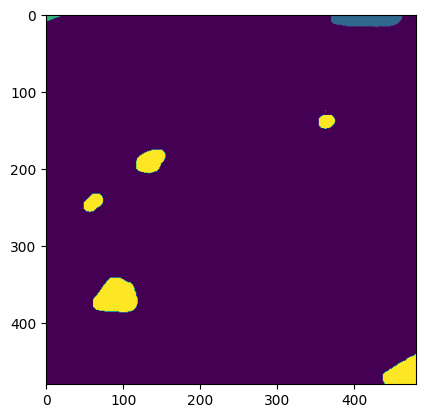

In [19]:
plt.imshow(int_encoded_mask)

In [20]:
print(int_encoded_mask.shape)
# combining all those 4 channels back to a single image

(480, 480)


In [21]:
np.random.seed(49)
dum_arr = np.random.rand(3, 3, 4)
print(dum_arr)
# 2 0 1. 2 0 2. 2 3 2

[[[0.30096446 0.24706183 0.92633514 0.89160344]
  [0.68327676 0.56688466 0.54696588 0.21042384]
  [0.76975447 0.8962301  0.72165046 0.49878035]]

 [[0.44221278 0.80243053 0.84483131 0.2291382 ]
  [0.96216754 0.05891834 0.28983789 0.31216414]
  [0.70190627 0.70760886 0.94302877 0.60638317]]

 [[0.35522729 0.42079923 0.90649957 0.251929  ]
  [0.30292044 0.07604763 0.25149304 0.91063559]
  [0.84364333 0.63719444 0.99010714 0.93991954]]]


In [22]:
print(np.argmax(dum_arr, axis=-1))

[[2 0 1]
 [2 0 2]
 [2 3 2]]


So here what is happening is that, let us say , if we go back to the image that we just used to experiment, where we divided the 3 features of the image into 4 different channels, so that all 4 of the features can be seen with clarity and seperately without any obstacles.

Now when we use the function argmax, what are we doing is that we are recompiling and combining the 4 channels, into which the image was distributed, into one image all back together.

how does it happens, is that if we see back in the image, at the top left corner, was a little hint of the sky, now only in the dimension or the channel of the sky, was the value of that pixel 1, otherwise the pixel holds value 0 in other channels.

Hence by combining all the channels, and assigning each channel a number beyween 0 and 3, the 4 channels are combined as one, where each number between 0 and 3 are signifying each feature, and in matplotlob, these numbers are signifying a different color, hence highlightng a new feature.

In [23]:
# Dataset Pipeline
class LunarDataset(Sequence):

    # Constructor - x_set, y_set, batch_size, dims, classes
    def __init__(self, x_set, y_set, batch_size, dims, classes):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.img_height, self.img_width = dims
        self.classes = classes

    # Number of Batches --> total length of images / batch size --> Ceil operation
    def __len__(self):
        return math.ceil(len(self.x)/self.batch_size)

    # Fetch the data in batches by using iter and next opertions
    def __getitem__(self, idx):
        # Get start and end indexes to create a batch of batch size
        start_index = idx * self.batch_size
        end_index = (idx + 1) * self.batch_size
        '''
        0*2 : 1*2 --> 0:2 --> 0, 1
        1*2 : 2*2 --> 2:4 --> 2, 3
        2*2 : 3*2 --> 4:6 --> 4, 5
        '''

        # Prepare X and y batches
        batch_x = self.x[start_index : end_index]
        batch_y = self.y[start_index : end_index]

        # Empty lists to append preprocessed Images and Masks Array from the for loop
        xtr = []
        ytr = []

        # For every  image and mask in one batch do the following preprocessing
        for idx, (filename_x, filename_y) in enumerate(zip(batch_x, batch_y)):

            # Image preprocessing
            img = imread(filename_x)[:self.img_height, :self.img_width, :]/255.0
            img = img.astype(np.float32)
            xtr.append(img)

            # Mask preprocessing
            mask = imread(filename_y, as_gray=True)[:self.img_height, :self.img_width]//0.07 # 0, 1, 3, 10
            mask[mask == 3] = 2
            mask[mask == 10] = 3
            mask = to_categorical(mask, num_classes = self.classes)
            ytr.append(mask)

        # Convert list to arrays ensuring the dtype of mask is also float32
        xtr = np.array(xtr)
        ytr = np.array(ytr).astype(np.float32)

        # Return the preprocessed batch of images and respective mask as output
        return xtr, ytr

In [24]:
# Parameters
batch_size = 16
dims = (480, 480)
num_classes = 4

# Dataset Creation
train_dataset = LunarDataset(X_train, y_train, batch_size, dims, num_classes)
valid_dataset = LunarDataset(X_valid, y_valid, batch_size, dims, num_classes)

In [25]:
# Taking a sample batch from train_dataset
batch = next(iter(train_dataset)) # Batch Size, Height, Width, Channels (Images, Masks)

# Check the shape of batch created --> Images and Masks
print(batch[0].shape) # 16 images in a batch
print(batch[1].shape) # 16 respective masks in a batch

(16, 480, 480, 3)
(16, 480, 480, 4)


In [26]:
# Get the mask
sample = batch[1][1] # Second in the batch

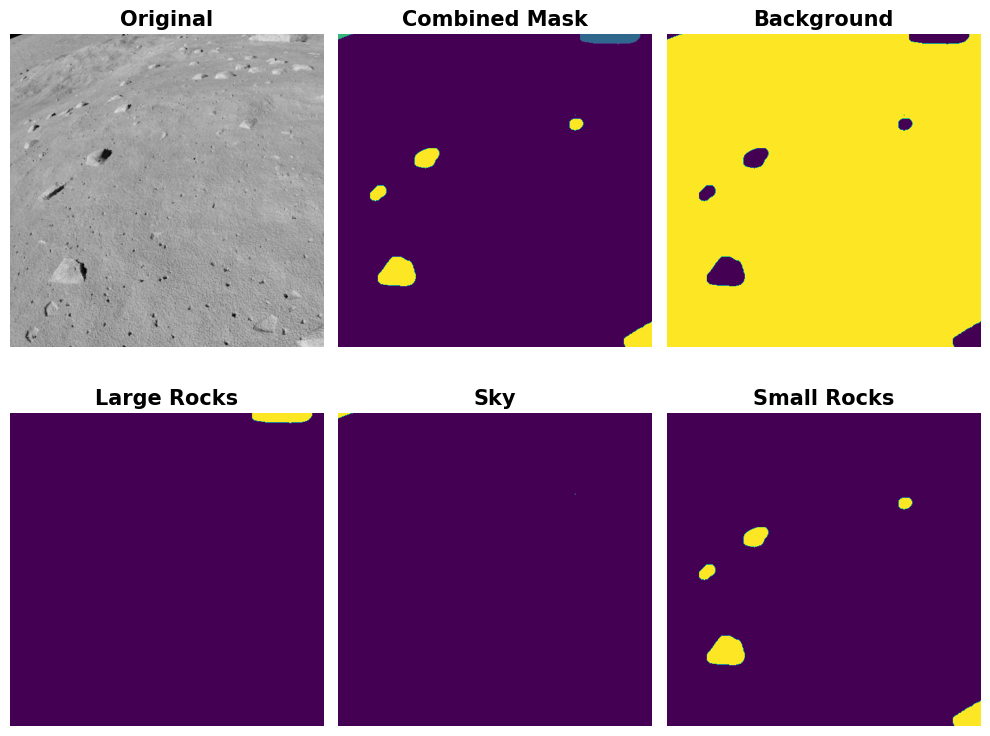

In [27]:
# Creating Subplot for better visualization
fig, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3, figsize = (10, 8))

# For different axes and titles
for i, (ax,title) in enumerate(zip((a1, a2, a3, a4, a5, a6),
                                   ('Original',
                                    'Combined Mask', 'Background', 'Large Rocks', 'Sky', 'Small Rocks'))):
    if i == 0:
        ax.imshow(batch[0][1])                    # Second Image in the batch (Original)
    elif i == 1:
        ax.imshow(np.argmax(sample, axis=-1))     # Converts One Hot encoded mask to Integer Encoded Mask (single channel)
    else:
        ax.imshow(sample[:, :, i-2])              # Channel Wise Output from Mask

    # Set Title and turn off the axis
    ax.set_title(title, fontsize=15, weight='bold')
    ax.axis('off')

# Adjust Layout and Display the Subplot
plt.tight_layout()
plt.show()

In [28]:
!pip install segmentation_models

In [29]:
# By default it tries to import keras, if it is not installed, it will try to start with tensorflow.keras framework
os.environ["SM_FRAMEWORK"] = "tf.keras" # Set the environment variable SM_FRAMEWORK to "tf.keras"
import segmentation_models as sm        # It will import without any errors if env variable is set properly
sm.set_framework('tf.keras')            # Use segmentation_models library and set the framework to TensorFlow's Keras

Segmentation Models: using `tf.keras` framework.


In [30]:
# Set the last axis of the tensor as channel axis
tf.keras.backend.set_image_data_format('channels_last')
# Explicitly setting this is not always necessary, as 'channels_last' is the default setting

In [31]:
BACKBONE = 'vgg16'
input_shape = (480, 480, 3)
n_classes = 4
activation = 'softmax'


model = sm.Unet(backbone_name = BACKBONE,
               input_shape = input_shape,
               classes = n_classes,
               activation = activation)
#=              encoder_weights = 'imagenet',
#              encoder_freeze = True)
# as of now we are not trying to do the transfer learning
# we are taking the ml shell of vgg16 and train it


model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 480, 480, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 480, 480, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 480, 480, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 240, 240, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 240, 240, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 240, 240, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 120, 120, 128)  │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 120, 120, 256)  │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 120, 120, 256)  │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 120, 120, 256)  │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 60, 60, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 60, 60, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 60, 60, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 60, 60, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 30, 30, 512)    │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)     │ (None, 30, 30, 512)    │      2,359,808 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv2 (Conv2D)     │ (None, 30, 30, 512)    │      2,359,808 │ block5_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv3 (Conv2D)

 Total params: 23,752,708 (90.61 MB)

 Trainable params: 23,748,676 (90.59 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'unet_vgg16.png')

In [32]:
""" Hyperparameters """
lr = 1e-4
batch_size = 16
epochs = 9

# metrics for result validation
metrics = [sm.metrics.IOUScore(threshold=0.5)]

# compiling the model --> Try changing the loss function to jacard_loss from sm library and see changes!
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(lr),
              metrics = metrics)


""" Callbacks """
callbacks = [
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor = 'val_loss',
            mode = 'min',
            patience = 2,
            factor = 0.1,
            verbose = 1,
            min_lr = 1e-6
        ),

        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_iou_score',
            patience = 3,
            mode = 'max',
            verbose = 1
        )
    ]

In [33]:
model_history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/9


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - iou_score: 0.3395 - loss: 0.6673

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - iou_score: 0.3398 - loss: 0.6668 - val_iou_score: 0.5842 - val_loss: 0.2069 - learning_rate: 1.0000e-04
Epoch 2/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 430s 849ms/step - iou_score: 0.7081 - loss: 0.1473 - val_iou_score: 0.7195 - val_loss: 0.1398 - learning_rate: 1.0000e-04
Epoch 3/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 432s 853ms/step - iou_score: 0.7573 - loss: 0.1175 - val_iou_score: 0.7498 - val_loss: 0.1088 - learning_rate: 1.0000e-04
Epoch 4/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 432s 853ms/step - iou_score: 0.7851 - loss: 0.1024 - val_iou_score: 0.7371 - val_loss: 0.1193 - learning_rate: 1.0000e-04
Epoch 5/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 431s 852ms/step - iou_score: 0.7835 - loss: 0.1013 - val_iou_score: 0.7964 - val_loss: 0.0937 - learning_rate: 1.0000e-04
Epoch 6/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 433s 856ms/step - iou_score: 0.8034 - loss: 0.0894 - val_iou_score: 0.7485 - val_loss: 0.1230 - learning_rate: 1.0000e-04
Epoch 7/9
500/500 ━━━━━━━━━━━━━━━━━━━━ 431s 852

In [34]:
# function to predict result
def predict_image(img_path, mask_path, model):
    ## Basic Setup
    H = 480
    W = 480
    num_classes = 4

    ## Read Images and Preprocess
    img = imread(img_path)
    img = img[:W, :H]
    img = img / 255.0
    img = img.astype(np.float32)

    ## Read mask and Preprocess
    mask = imread(mask_path, as_gray = True)
    mask = mask[:W, :H]

    ## Prediction mask and Postprocess
    pred_mask = model.predict(np.expand_dims(img, axis=0))
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]


    ## Calculating IOU score
    inter = np.logical_and(mask, pred_mask)
    union = np.logical_or(mask, pred_mask)

    iou = inter.sum()/union.sum()

    return img, mask, pred_mask, iou

In [35]:
print(X_test[0], y_test[0])

/kaggle/input/artificial-lunar-rocky-landscape-dataset/images/render/render9763.png /kaggle/input/artificial-lunar-rocky-landscape-dataset/images/clean/clean9763.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


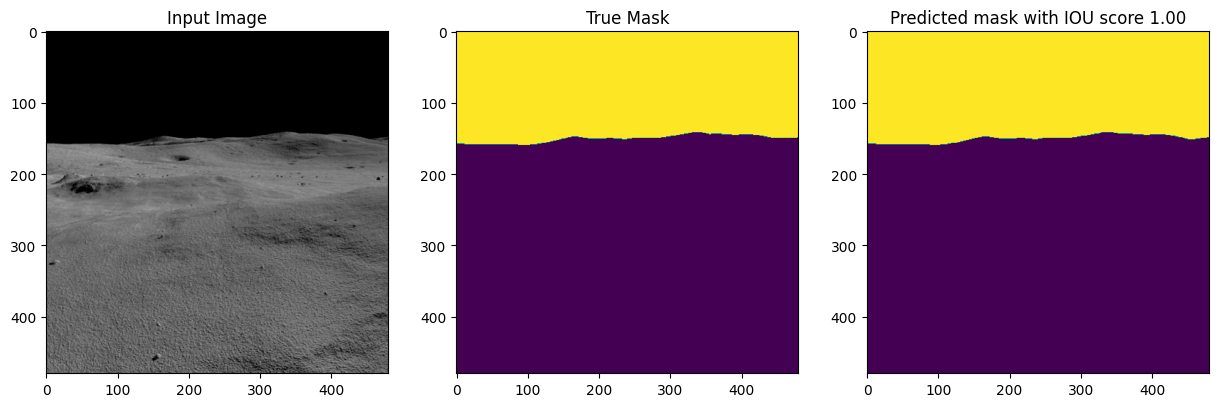

In [36]:
index_test = 0
img_path = X_test[index_test]
mask_path = y_test[index_test]

img, mask, pred_mask, iou = predict_image(img_path, mask_path, model)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15, 10))

ax1.set_title("Input Image")
ax1.imshow(img)

ax2.set_title("True Mask")
ax2.imshow(mask)

ax3.set_title("Predicted mask with IOU score %.2f"%(iou))
ax3.imshow(pred_mask)

plt.show()

In [41]:
from tensorflow.keras.models import load_model, save_model
# Save the Model
save_model(model, 'LunarModel_2.h5')

In [42]:
# Load the Model and test it
loaded_model = load_model('/kaggle/working/LunarModel_2.h5')
_, _, _, iou_score = predict_image(img_path, mask_path, loaded_model)
print(iou_score)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0.9990352279618502


In [43]:
from IPython.display import FileLink
FileLink('LunarModel_2.h5')

/kaggle/working/LunarModel_2.h5